In [ ]:
### Step - 1: WHO API Endpoints

In [62]:
Adult_Obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_30C"
Child_Obesity = "https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
Adult_Underweight = "https://ghoapi.azureedge.net/api/NCD_BMI_18C"
Child_Thinness = "https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

In [30]:
### Import Required Libraries

In [63]:
import requests
import pandas as pd

In [32]:
### Function to Fetch WHO API Data

In [64]:
def fetch_who_data(url):
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['value'])
    return df


In [34]:
####Load All 4 Datasets

In [65]:
# Obesity datasets
df_adult_obesity = fetch_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_30C")
df_child_obesity = fetch_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C")

# Malnutrition datasets
df_adult_underweight = fetch_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_18C")
df_child_thinness = fetch_who_data("https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C")


In [36]:
### Add age_group Column (MANDATORY)

In [66]:
df_adult_obesity['age_group'] = 'Adult'
df_adult_underweight['age_group'] = 'Adult'

df_child_obesity['age_group'] = 'Child/Adolescent'
df_child_thinness['age_group'] = 'Child/Adolescent'


In [38]:
### Filter Years (2012–2022)

In [67]:
def filter_years(df):
    return df[(df['TimeDim'] >= 2012) & (df['TimeDim'] <= 2022)]


In [68]:
#Apply it:
df_adult_obesity = filter_years(df_adult_obesity)
df_child_obesity = filter_years(df_child_obesity)
df_adult_underweight = filter_years(df_adult_underweight)
df_child_thinness = filter_years(df_child_thinness)


In [41]:
### Combine Datasets

In [69]:
#Obesity DataFrame
df_obesity = pd.concat(
    [df_adult_obesity, df_child_obesity],
    ignore_index=True
)

#Malnutrition DataFrame
df_malnutrition = pd.concat(
    [df_adult_underweight, df_child_thinness],
    ignore_index=True
)

In [70]:
# print validation 
print("Obesity shape:", df_obesity.shape)
print("Malnutrition shape:", df_malnutrition.shape)


Obesity shape: (27720, 26)
Malnutrition shape: (27720, 26)


In [71]:
df_obesity.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,6393117,NCD_BMI_30C,COUNTRY,NOR,EUR,YEAR,Europe,SEX,2012,SEX_MLE,...,18.2 [15.7-20.8],18.185636,15.696402,20.831339,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adult
1,6393937,NCD_BMI_30C,COUNTRY,SLV,AMR,YEAR,Americas,SEX,2022,SEX_MLE,...,22.0 [16.2-28.5],21.981847,16.178921,28.469047,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,Adult
2,6394266,NCD_BMI_30C,COUNTRY,BTN,SEAR,YEAR,South-East Asia,SEX,2016,SEX_FMLE,...,10.8 [9.1-12.6],10.814524,9.144749,12.639518,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,Adult
3,6394658,NCD_BMI_30C,COUNTRY,KWT,EMR,YEAR,Eastern Mediterranean,SEX,2022,SEX_BTSX,...,45.4 [40.6-50.1],45.364562,40.553549,50.140989,None,2024-02-29T16:06:41.017+01:00,2022,2022-01-01T00:00:00+01:00,2022-12-31T00:00:00+01:00,Adult
4,6395386,NCD_BMI_30C,COUNTRY,NLD,EUR,YEAR,Europe,SEX,2020,SEX_BTSX,...,16.7 [13.9-19.6],16.651030,13.925606,19.624427,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult


In [72]:
df_malnutrition.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,age_group
0,6393674,NCD_BMI_18C,COUNTRY,GIN,YEAR,AFR,Africa,SEX,2016,SEX_FMLE,...,10.0 [7.8-12.4],9.953265,7.770003,12.415978,None,2024-02-29T16:06:41.017+01:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00,Adult
1,6394868,NCD_BMI_18C,COUNTRY,SWZ,YEAR,AFR,Africa,SEX,2015,SEX_MLE,...,5.7 [3.7-8.2],5.749661,3.684124,8.226114,None,2024-02-29T16:06:41.017+01:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00,Adult
2,6402593,NCD_BMI_18C,COUNTRY,WSM,YEAR,WPR,Western Pacific,SEX,2017,SEX_FMLE,...,0.5 [0.2-1.1],0.508007,0.158555,1.125720,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Adult
3,6403925,NCD_BMI_18C,COUNTRY,GEO,YEAR,EUR,Europe,SEX,2020,SEX_BTSX,...,2.4 [1.5-3.4],2.368255,1.545862,3.415949,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult
4,6407072,NCD_BMI_18C,COUNTRY,EST,YEAR,EUR,Europe,SEX,2020,SEX_MLE,...,0.8 [0.3-1.6],0.795582,0.311791,1.603356,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adult


In [73]:
df_obesity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  27720 non-null  int64  
 1   IndicatorCode       27720 non-null  object 
 2   SpatialDimType      27720 non-null  object 
 3   SpatialDim          27720 non-null  object 
 4   ParentLocationCode  26268 non-null  object 
 5   TimeDimType         27720 non-null  object 
 6   ParentLocation      26268 non-null  object 
 7   Dim1Type            27720 non-null  object 
 8   TimeDim             27720 non-null  int64  
 9   Dim1                27720 non-null  object 
 10  Dim2Type            27720 non-null  object 
 11  Dim2                27720 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [74]:
df_malnutrition.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  27720 non-null  int64  
 1   IndicatorCode       27720 non-null  object 
 2   SpatialDimType      27720 non-null  object 
 3   SpatialDim          27720 non-null  object 
 4   TimeDimType         27720 non-null  object 
 5   ParentLocationCode  26268 non-null  object 
 6   ParentLocation      26268 non-null  object 
 7   Dim1Type            27720 non-null  object 
 8   TimeDim             27720 non-null  int64  
 9   Dim1                27720 non-null  object 
 10  Dim2Type            27720 non-null  object 
 11  Dim2                27720 non-null  object 
 12  Dim3Type            0 non-null      object 
 13  Dim3                0 non-null      object 
 14  DataSourceDimType   0 non-null      object 
 15  DataSourceDim       0 non-null      object 
 16  Valu

In [75]:
df_obesity['TimeDim'].min(), df_obesity['TimeDim'].max()


(np.int64(2012), np.int64(2022))

In [76]:
df_malnutrition['TimeDim'].min(), df_malnutrition['TimeDim'].max()

(np.int64(2012), np.int64(2022))

In [77]:
### Step:2 keep only
cols_to_keep = [
    'ParentLocation',
    'Dim1',
    'TimeDim',
    'Low',
    'High',
    'NumericValue',
    'SpatialDim',
    'age_group'
]



In [79]:
df_obesity = df_obesity[cols_to_keep]


In [78]:
df_malnutrition = df_malnutrition[cols_to_keep]


In [80]:
### Rename columns
rename_map = {
    'TimeDim': 'Year',
    'Dim1': 'Gender',
    'NumericValue': 'Mean_Estimate',
    'Low': 'LowerBound',
    'High': 'UpperBound',
    'ParentLocation': 'Region',
    'SpatialDim': 'Country'
}



In [81]:
df_obesity.rename(columns=rename_map, inplace=True)

In [82]:
df_malnutrition.rename(columns=rename_map, inplace=True)


In [83]:
### Standardize Gender Values
def clean_gender(val):
    if val in ['Male', 'Males']:
        return 'Male'
    elif val in ['Female', 'Females']:
        return 'Female'
    else:
        return 'Both'



In [84]:
df_obesity['Gender'] = df_obesity['Gender'].apply(clean_gender)


In [85]:
df_malnutrition['Gender'] = df_malnutrition['Gender'].apply(clean_gender)


In [86]:
### Convert Country Codes → Full Names (pycountry)
!pip install pycountry
import pycountry



In [87]:
### Conversion fn
def convert_country(code):
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        return code


In [88]:
### Apply 
df_obesity['Country'] = df_obesity['Country'].apply(convert_country)


In [89]:
df_malnutrition['Country'] = df_malnutrition['Country'].apply(convert_country)


In [90]:
### Handle Special Region Codes (MANDATORY)
special_cases = {
    'GLOBAL': 'Global',
    'WB_LMI': 'Low & Middle Income',
    'WB_HI': 'High Income',
    'WB_LI': 'Low Income',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe',
    'AFR': 'Africa',
    'SEAR': 'South-East Asia Region',
    'WPR': 'Western Pacific Region',
    'AMR': 'Americas Region',
    'WB_UMI': 'Upper Middle Income'
}


In [91]:
### Apply maping
df_obesity['Country'] = df_obesity['Country'].replace(special_cases)
df_malnutrition['Country'] = df_malnutrition['Country'].replace(special_cases)


In [93]:
### Create CI_Width
df_obesity['CI_Width'] = df_obesity['UpperBound'] - df_obesity['LowerBound']
df_malnutrition['CI_Width'] = df_malnutrition['UpperBound'] - df_malnutrition['LowerBound']


In [94]:
### Create Obesity Levels (Obesity table ONLY)
def obesity_level(val):
    if val >= 30:
        return 'High'
    elif val >= 25:
        return 'Moderate'
    else:
        return 'Low'

df_obesity['obesity_level'] = df_obesity['Mean_Estimate'].apply(obesity_level)


In [95]:
### Create Malnutrition Levels (Malnutrition table ONLY)
def malnutrition_level(val):
    if val >= 20:
        return 'High'
    elif val >= 10:
        return 'Moderate'
    else:
        return 'Low'

df_malnutrition['malnutrition_level'] = df_malnutrition['Mean_Estimate'].apply(malnutrition_level)


In [97]:
###Validation
df_obesity.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,obesity_level
0,Europe,Both,2012,15.696402,20.831339,18.185636,Norway,Adult,5.134937,Low
1,Americas,Both,2022,16.178921,28.469047,21.981847,El Salvador,Adult,12.290126,Low
2,South-East Asia,Both,2016,9.144749,12.639518,10.814524,Bhutan,Adult,3.494769,Low
3,Eastern Mediterranean,Both,2022,40.553549,50.140989,45.364562,Kuwait,Adult,9.587440,High
4,Europe,Both,2020,13.925606,19.624427,16.651030,Netherlands,Adult,5.698821,Low


In [98]:
df_malnutrition.head()

,Region,Gender,Year,LowerBound,UpperBound,Mean_Estimate,Country,age_group,CI_Width,malnutrition_level
0,Africa,Both,2016,7.770003,12.415978,9.953265,Guinea,Adult,4.645975,Low
1,Africa,Both,2015,3.684124,8.226114,5.749661,Eswatini,Adult,4.541989,Low
2,Western Pacific,Both,2017,0.158555,1.125720,0.508007,Samoa,Adult,0.967166,Low
3,Europe,Both,2020,1.545862,3.415949,2.368255,Georgia,Adult,1.870087,Low
4,Europe,Both,2020,0.311791,1.603356,0.795582,Estonia,Adult,1.291565,Low


In [99]:
df_obesity.shape

(27720, 10)

In [100]:
df_malnutrition.shape

(27720, 10)

In [101]:
df_obesity.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'age_group', 'CI_Width', 'obesity_level'],
      dtype='object')

In [102]:
df_malnutrition.columns

Index(['Region', 'Gender', 'Year', 'LowerBound', 'UpperBound', 'Mean_Estimate',
       'Country', 'age_group', 'CI_Width', 'malnutrition_level'],
      dtype='object')

In [103]:
### Step:3 Exploratory Data Analysis (EDA) with Python

In [104]:
df_obesity.describe()

,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,9.393155,17.068488,12.761040,7.675334
std,3.162335,9.893854,12.395013,10.858925,6.616899
min,2012.000000,0.077541,0.547848,0.265672,0.216695
25%,2014.000000,2.354433,7.875503,4.753964,2.926708
50%,2017.000000,6.506534,13.704382,9.944541,5.480536
75%,2020.000000,12.697752,23.986050,17.482417,10.338880
max,2022.000000,74.365371,87.868512,80.609250,40.554062


In [105]:
df_malnutrition.describe()


,Year,LowerBound,UpperBound,Mean_Estimate,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,2017.000000,3.397094,8.147889,5.354451,4.750795
std,3.162335,3.908061,6.443692,4.811220,4.257683
min,2012.000000,0.023703,0.354833,0.175309,0.166679
25%,2014.000000,1.053666,3.143307,2.039278,1.603222
50%,2017.000000,1.907971,6.095557,3.597794,3.351093
75%,2020.000000,4.186440,11.526301,7.335245,6.530869
max,2022.000000,31.365401,43.680286,35.894114,26.701744


In [106]:
df_obesity.isnull().sum()

Region           1452
Gender              0
Year                0
LowerBound          0
UpperBound          0
Mean_Estimate       0
Country             0
age_group           0
CI_Width            0
obesity_level       0
dtype: int64

In [107]:
df_malnutrition.isnull().sum()
### “Some aggregate-level records (e.g., Global or income groups) do not belong to a specific WHO region, resulting in missing Region values.”

Region                1452
Gender                   0
Year                     0
LowerBound               0
UpperBound               0
Mean_Estimate            0
Country                  0
age_group                0
CI_Width                 0
malnutrition_level       0
dtype: int64

In [110]:
!pip install matplotlib seaborn
!pip install matplotlib

Matplotlib is building the font cache; this may take a moment.


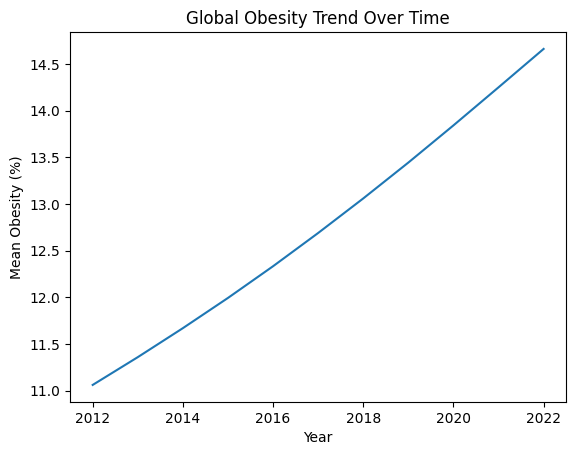

In [111]:
### Global Trend Over Time (Line Plot)
### Obesity trend
import matplotlib.pyplot as plt

obesity_trend = df_obesity.groupby('Year')['Mean_Estimate'].mean()

plt.figure()
obesity_trend.plot()
plt.title("Global Obesity Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Obesity (%)")
plt.show()


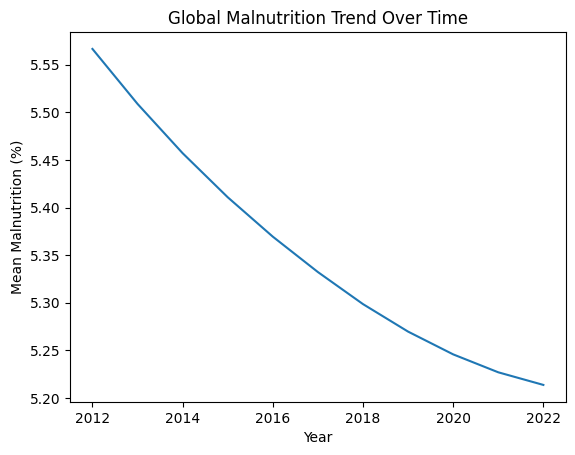

In [112]:
### Malnutrition trend
malnutrition_trend = df_malnutrition.groupby('Year')['Mean_Estimate'].mean()

plt.figure()
malnutrition_trend.plot()
plt.title("Global Malnutrition Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Mean Malnutrition (%)")
plt.show()


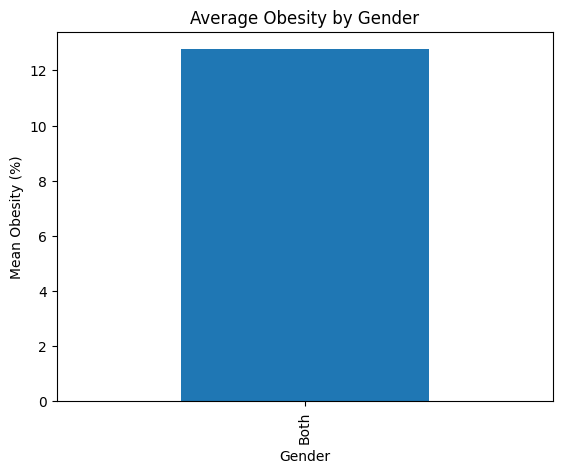

In [113]:
### Gender-wise Comparison (Bar Chart)
gender_obesity = df_obesity.groupby('Gender')['Mean_Estimate'].mean()

plt.figure()
gender_obesity.plot(kind='bar')
plt.title("Average Obesity by Gender")
plt.ylabel("Mean Obesity (%)")
plt.show()


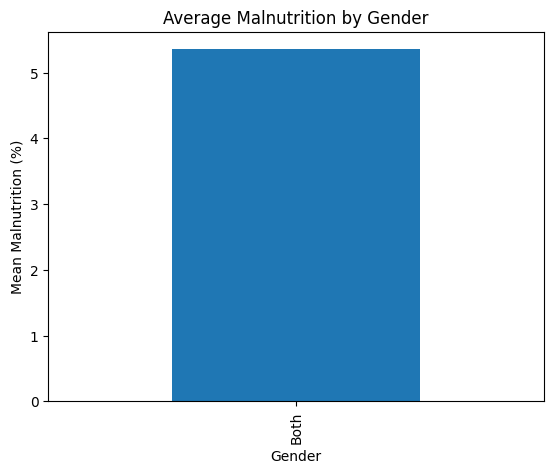

In [114]:
gender_malnutrition = df_malnutrition.groupby('Gender')['Mean_Estimate'].mean()

plt.figure()
gender_malnutrition.plot(kind='bar')
plt.title("Average Malnutrition by Gender")
plt.ylabel("Mean Malnutrition (%)")
plt.show()


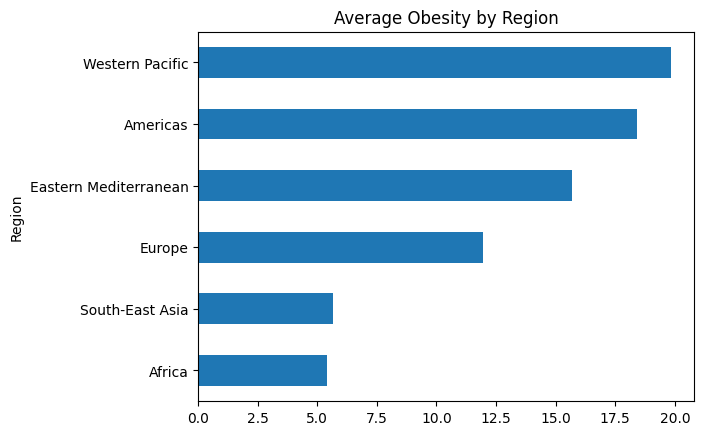

In [115]:
### Region-wise Comparison
region_obesity = df_obesity.groupby('Region')['Mean_Estimate'].mean().sort_values()

plt.figure()
region_obesity.plot(kind='barh')
plt.title("Average Obesity by Region")
plt.show()


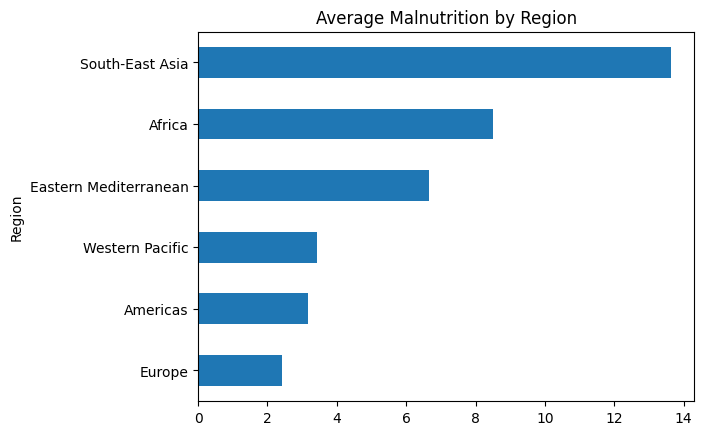

In [116]:
region_malnutrition = df_malnutrition.groupby('Region')['Mean_Estimate'].mean().sort_values()

plt.figure()
region_malnutrition.plot(kind='barh')
plt.title("Average Malnutrition by Region")
plt.show()


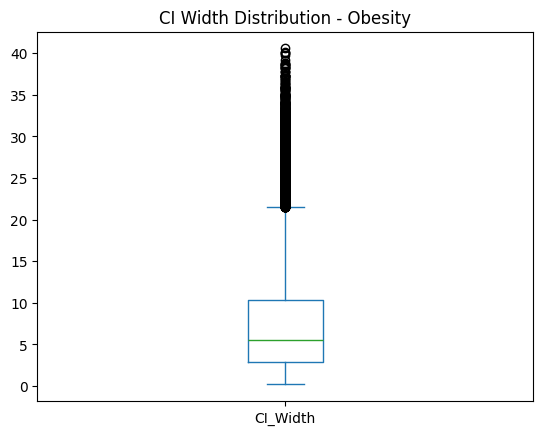

In [117]:
### CI_Width Distribution (Reliability Check)
plt.figure()
df_obesity['CI_Width'].plot(kind='box')
plt.title("CI Width Distribution - Obesity")
plt.show()


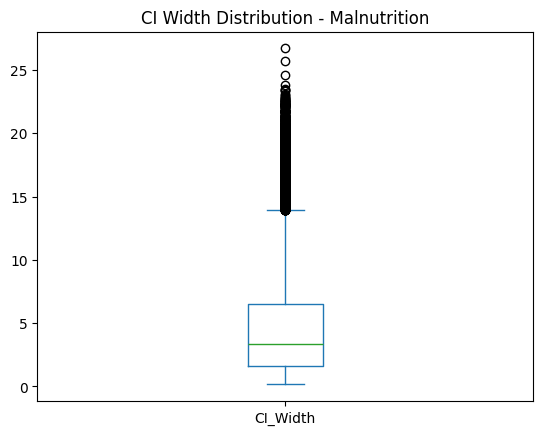

In [118]:
plt.figure()
df_malnutrition['CI_Width'].plot(kind='box')
plt.title("CI Width Distribution - Malnutrition")
plt.show()


<Figure size 640x480 with 0 Axes>

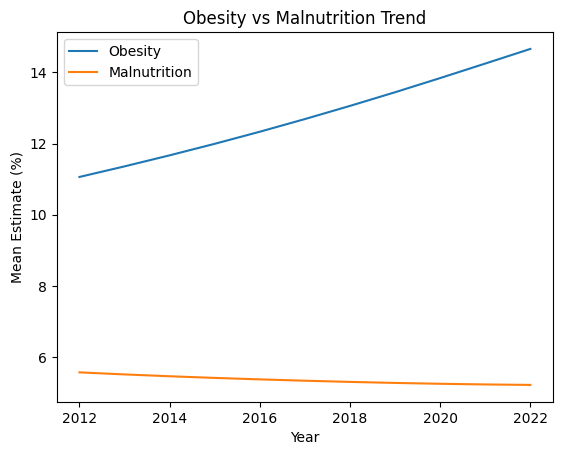

In [119]:
###Obesity vs Malnutrition (Comparison Insight)
compare = df_obesity.groupby('Year')['Mean_Estimate'].mean().to_frame('Obesity')
compare['Malnutrition'] = df_malnutrition.groupby('Year')['Mean_Estimate'].mean()

plt.figure()
compare.plot()
plt.title("Obesity vs Malnutrition Trend")
plt.xlabel("Year")
plt.ylabel("Mean Estimate (%)")
plt.show()


In [120]:
#### Step : 4 Insert Data into SQL + Query Writing
###Python → MySQL Connection

In [121]:
import mysql.connector

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="0998",
    database="nutrition_db"
)

cursor = db.cursor()


In [122]:
### Insert df_obesity into MySQL
for _, row in df_obesity.iterrows():
    cursor.execute("""
        INSERT INTO obesity VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """, (
        int(row['Year']),
        row['Gender'],
        float(row['Mean_Estimate']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        row['age_group'],
        row['Country'],
        row['Region'],
        float(row['CI_Width']),
        row['obesity_level']
    ))

db.commit()


In [123]:
### Insert df_malnutrition
for _, row in df_malnutrition.iterrows():
    cursor.execute("""
        INSERT INTO malnutrition VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
    """, (
        int(row['Year']),
        row['Gender'],
        float(row['Mean_Estimate']),
        float(row['LowerBound']),
        float(row['UpperBound']),
        row['age_group'],
        row['Country'],
        row['Region'],
        float(row['CI_Width']),
        row['malnutrition_level']
    ))

db.commit()
